In [4]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def load_data():
    d=sio.loadmat(r'C:\Users\84280\Desktop\lianxi\varriance\ex5data1.mat')
    return map(np.ravel,[d['X'],d['y'],d['Xval'],d['yval'],d['Xtest'],d['ytest']])


In [6]:
X,y,Xval,yval,Xtest,ytest=load_data()

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


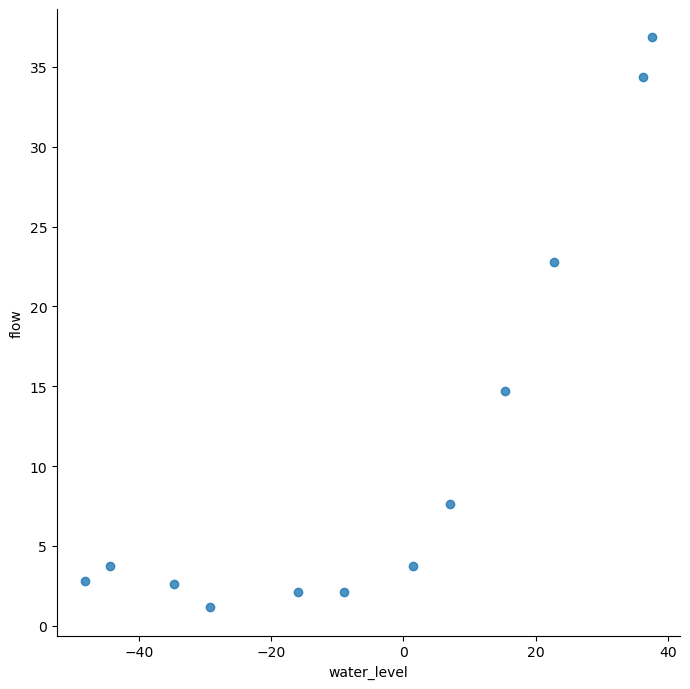

In [7]:
df = pd.DataFrame({'water_level':X,'flow':y})

sns.lmplot('water_level','flow',data=df,fit_reg=False,size=7)
plt.show()

In [8]:
X,Xval,Xtest=[np.insert(x.reshape(x.shape[0],1),0,np.ones(x.shape[0]),axis=1) for x in (X,Xval,Xtest)]

In [9]:
print(X.shape,Xval.shape,Xtest.shape)

(12, 2) (21, 2) (21, 2)


In [10]:
def cost(theta,X,y):
    m = X.shape[0]
    inner = X@theta -y
    square_sum = inner.T @ inner 
    cost = square_sum / (2*m)
    
    return cost

In [11]:
theta=np.ones(X.shape[1])

cost(theta,X,y)

303.9515255535976

In [12]:
def gradient(theta,X,y):
    m=X.shape[0]
    inner = X.T @ (X @ theta -y )
    return inner / m



In [13]:
gradient(theta,X,y)

array([-15.30301567, 598.16741084])

In [14]:
def regularized_gradient(theta,X,y,l=1):
    m = X.shape[0]
    
    regularized_term=theta.copy()
    regularized_term[0]=0
    
    regularized_term=(l/m)*regularized_term
    
    return gradient(theta,X,y)+regularized_term

In [15]:
regularized_gradient(theta,X,y)

array([-15.30301567, 598.25074417])

In [16]:
def linear_regression(X,y,l):
    theta=np.ones(X.shape[1])
    
    res=opt.minimize(fun=regularized_cost,
                    x0=theta,
                    args=(X,y,l),
                    method='TNC',
                    jac=regularized_gradient,
                    options={'disp':True})
    return res


In [17]:
def regularized_cost(theta,X,y,l=1):
    m = X.shape[0]
    
    regularized_term = (l/(2*m))*np.power(theta[1:],2).sum()
    
    return cost(theta,X,y)+regularized_term

In [18]:
theta = np.ones(X.shape[0])

final_theta=linear_regression(X,y,l=0).get('x')

In [19]:
final_theta
print(final_theta[0])

13.087903983316089


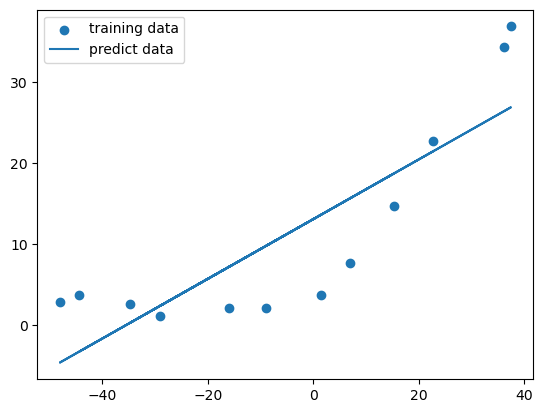

In [20]:
b = final_theta[0]
m = final_theta[1]

plt.scatter(X[:,1],y,label='training data')
plt.plot(X[:,1],X[:,1]*m+b,label='predict data')
plt.legend(loc=2)
plt.show()

In [21]:
training_cost,cv_cost=[],[]
m=X.shape[0]

In [22]:
for i in range(1,m+1):
    print('i={}'.format(i))
    res = linear_regression(X[:i,:],y[:i],l=0)
    theta=res.get('x')
    tc=regularized_cost(theta,X[:i,:],y[:i],l=0)
    cv=regularized_cost(theta,Xval,yval,l=0)
    training_cost.append(tc)
    cv_cost.append(cv)
print(training_cost,cv_cost)


i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9
i=10
i=11
i=12
[8.631534185484672e-18, 8.371044654825317e-18, 3.2865950455012833, 2.842677689399798, 13.154048809114935, 19.443962512495474, 20.098521655088934, 18.172858695200027, 22.60940542495473, 23.261461592611923, 24.317249588044152, 22.373906495109015] [169.87070840820138, 110.30036584504248, 45.01023144430755, 48.368911472697064, 35.865165210006616, 33.82996176310068, 31.97098569211143, 30.86244629494908, 31.135997941431913, 28.936207298094025, 29.551431595468358, 29.433817552413096]


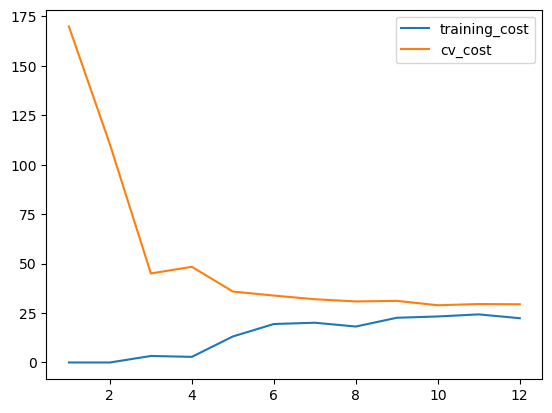

In [23]:
plt.plot(np.arange(1,m+1),training_cost,label='training_cost')
plt.plot(np.arange(1,m+1),cv_cost,label='cv_cost')
plt.legend(loc='best')
plt.show()

In [24]:
## 欠拟合
def prepare_poly_data(*args,power):
    def prepare(x):
        df=poly_features(x,power=power)
        ndarr=normalize_feature(df).to_numpy()
        
        return np.insert(ndarr,0,np.ones(ndarr.shape[0]),axis=1)
    
    return [prepare(x) for x in args]

In [25]:
def poly_features(x,power,as_ndarray=False):
    data={'f{}'.format(i):np.power(x,i) for i in range(1,power+1)}
    df=pd.DataFrame(data)
    
    return df.as_matrix() if as_ndarray else df 
# 这里给一个选项在需要返回numpy的数据类型的时候返回 as_ndarray =True



In [26]:
X,y,Xval,yval,Xtest,ytest=load_data()

In [27]:
poly_features(X,power=3)

,f1,f2,f3
0,-15.936758,253.980260,-4047.621971
1,-29.152979,849.896197,-24777.006175
2,36.189549,1309.683430,47396.852168
3,37.492187,1405.664111,52701.422173
4,-48.058829,2309.651088,-110999.127750
5,-8.941458,79.949670,-714.866612
6,15.307793,234.328523,3587.052500
7,-34.706266,1204.524887,-41804.560890
8,1.389154,1.929750,2.680720
9,-44.383760,1969.918139,-87432.373590


In [28]:
def normalize_feature(df):
    return df.apply(lambda column:(column-column.mean())/column.std())

In [29]:
X_poly,Xval_poly,Xtest_poly=prepare_poly_data(X,Xval,Xtest,power=8)
X_poly[:3,:]

array([[ 1.00000000e+00, -3.62140776e-01, -7.55086688e-01,
         1.82225876e-01, -7.06189908e-01,  3.06617917e-01,
        -5.90877673e-01,  3.44515797e-01, -5.08481165e-01],
       [ 1.00000000e+00, -8.03204845e-01,  1.25825266e-03,
        -2.47936991e-01, -3.27023420e-01,  9.33963187e-02,
        -4.35817606e-01,  2.55416116e-01, -4.48912493e-01],
       [ 1.00000000e+00,  1.37746700e+00,  5.84826715e-01,
         1.24976856e+00,  2.45311974e-01,  9.78359696e-01,
        -1.21556976e-02,  7.56568484e-01, -1.70352114e-01]])

In [30]:
def plot_learning_curve(X, y, Xval, yval, l=0):
    training_cost, cv_cost = [], []
    m = X.shape[0]

    for i in range(1, m + 1):
        # regularization applies here for fitting parameters
        res = linear_regression(X[:i, :], y[:i], l=l)

        # remember, when you compute the cost here, you are computing
        # non-regularized cost. Regularization is used to fit parameters only
        tc = cost(res.x, X[:i, :], y[:i])
        cv = cost(res.x, Xval, yval)

        training_cost.append(tc)
        cv_cost.append(cv)

    plt.plot(np.arange(1, m + 1), training_cost, label='training cost')
    plt.plot(np.arange(1, m + 1), cv_cost, label='cv cost')
    plt.legend(loc=1)

def plot_learning_curve(X,y,Xval,yval,l=0):
    training_cost, cv_cost=[],[]
    m=X.shape[0]
    for i in range(1,m+1):
    
        res = linear_regression(X[:i,:],y[:i],l=1)
        theta=res.get('x')
        print(theta)
        tc=cost(theta,X[:i,:],y[:i])
        cv=cost(theta,Xval,yval)
        
        training_cost.append(tc)
        cv_cost.append(cv)
        
    
    plt.plot(np.arange(1,m+1),training_cost,label='tarining')
    plt.plot(np.arange(1,m+1),cv_cost,label='cv cost')
    
    plt.legend(loc='best')
    
    
    

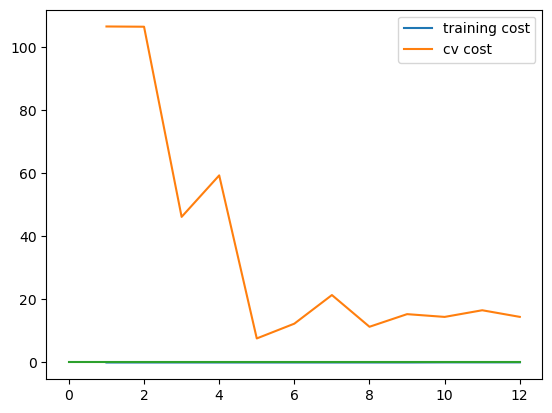

In [31]:

plot_learning_curve(X_poly,y,Xval_poly,yval,l=0)
plt.plot([0,12],[0,0],label='reference')
plt.show()

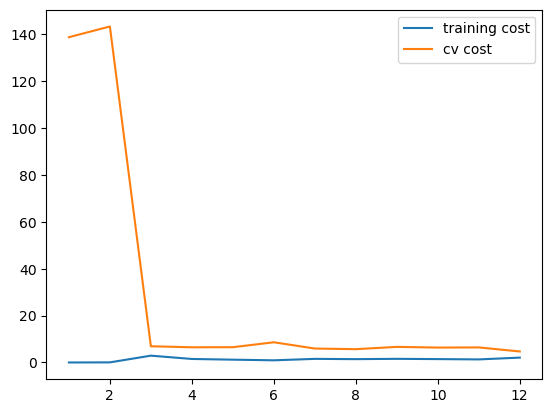

In [32]:
plot_learning_curve(X_poly,y,Xval_poly,yval,l=1)
plt.show()

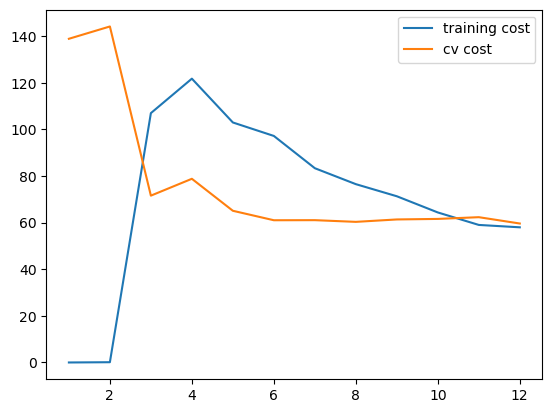

In [33]:
plot_learning_curve(X_poly,y,Xval_poly,yval,l=100)
plt.show()

In [34]:
l_candidate=[0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10]
training_cost1=[]
cv_cost1=[]


In [35]:
c=0
for l in l_candidate:
    print(l)
    c+=1
    print(c)
    res = linear_regression(X_poly,y,l)
    
    tc=cost(res.x,X_poly,y)
    cv=cost(res.x,Xval_poly,yval)
    
    training_cost1.append(tc)
    
    cv_cost1.append(cv)
    print(training_cost1,cv_cost1)


0
1
[0.04635509337181468] [14.443202675265363]
0.001
2
[0.04635509337181468, 0.11361894152583792] [14.443202675265363, 10.630083178568874]
0.003
3
[0.04635509337181468, 0.11361894152583792, 0.17067244755902986] [14.443202675265363, 10.630083178568874, 14.955105330289651]
0.01
4
[0.04635509337181468, 0.11361894152583792, 0.17067244755902986, 0.22148574026677215] [14.443202675265363, 10.630083178568874, 14.955105330289651, 15.083552283242016]
0.03
5
[0.04635509337181468, 0.11361894152583792, 0.17067244755902986, 0.22148574026677215, 0.28186724503924815] [14.443202675265363, 10.630083178568874, 14.955105330289651, 15.083552283242016, 12.04400652274228]
0.1
6
[0.04635509337181468, 0.11361894152583792, 0.17067244755902986, 0.22148574026677215, 0.28186724503924815, 0.45931853603120976] [14.443202675265363, 10.630083178568874, 14.955105330289651, 15.083552283242016, 12.04400652274228, 7.999532518354331]
0.3
7
[0.04635509337181468, 0.11361894152583792, 0.17067244755902986, 0.22148574026677215,

[8.631534185484672e-18, 8.371044654825317e-18, 3.2865950455012833, 2.842677689399798, 13.154048809114935, 19.443962512495474, 20.098521655088934, 18.172858695200027, 22.60940542495473, 23.261461592611923, 24.317249588044152, 22.373906495109015]


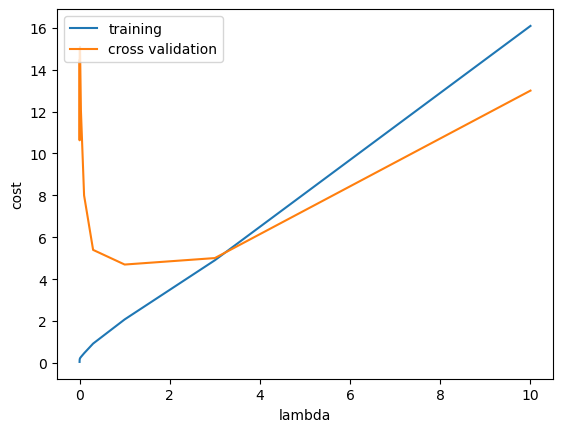

In [36]:
print(training_cost)
plt.plot(l_candidate,training_cost1,label='training')
plt.plot(l_candidate,cv_cost1,label='cross validation')

plt.legend(loc=2)

plt.xlabel('lambda')
plt.ylabel('cost')
plt.show()

In [40]:
print(cv_cost1)
l_candidate[np.argmin(cv_cost1)] # 这个函数是返回最小位置的索引


[14.443202675265363, 10.630083178568874, 14.955105330289651, 15.083552283242016, 12.04400652274228, 7.999532518354331, 5.396678764565268, 4.6966786629671216, 5.005834541161541, 13.003209957173867]


1

In [45]:
for l in l_candidate:
    theta = linear_regression(X_poly,y,l).x
    print('test costl={},{}'.format(l,cost(theta,Xtest_poly,ytest)))

test costl=0,9.927561011077884
test costl=0.001,11.009120223754561
test costl=0.003,11.281321165972614
test costl=0.01,10.881602520742618
test costl=0.03,10.022248762989022
test costl=0.1,8.632062454874154
test costl=0.3,7.336509387551767
test costl=1,7.466281412019082
test costl=3,11.643937786632627
test costl=10,27.715080292432077
